<h1><b>Importing Required Modules

In [1]:
import tensorflow as tf
import tensorflow
import matplotlib.pyplot as plt
# import visualkeras as visual
# from collections import defaultdict
import tensorflow as tf
from tensorflow.keras import layers, losses, models
# from keras.utils import plot_model
import os
from tensorflow.keras.callbacks import TensorBoard
import numpy

<h1><b>Loading Data

In [23]:
# Loading the data: MNIST Handwritten Digits

(X_train, _), (X_test, _) = tensorflow.keras.datasets.mnist.load_data()

In [24]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [25]:
X_train, X_val = X_train[:-10000], X_train[:-10000]

In [26]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_val = X_val.astype('float32')/255.0

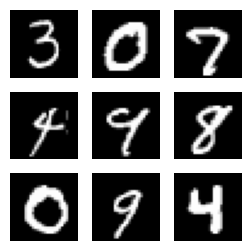

In [27]:
plt.figure(figsize=(3, 3))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i+50].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


<h1><b>Adding Noise to Images

In [28]:
noised_X_train = X_train + 0.3*tf.random.normal(shape = X_train.shape)
noised_X_test = X_test + 0.3*tf.random.normal(shape = X_test.shape)

In [29]:
noised_X_train = tf.clip_by_value(noised_X_train,
                                  clip_value_min=0,
                                  clip_value_max=1)

noised_X_test = tf.clip_by_value(noised_X_test,
                                  clip_value_min=0,
                                  clip_value_max=1)

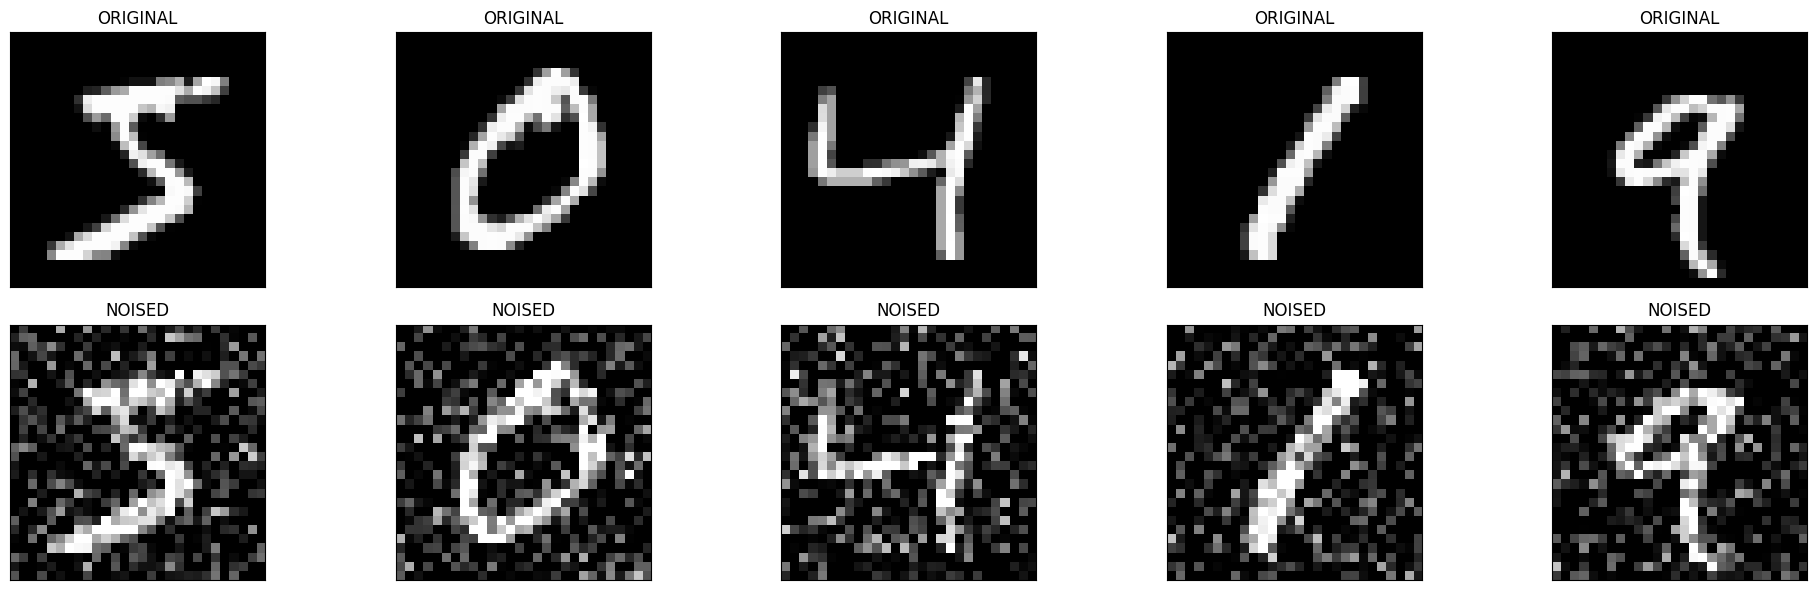

In [30]:
n = 5
plt.figure(figsize=(20, 6))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_train[i])
  plt.title("ORIGINAL")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(tf.squeeze(noised_X_train[i]))
  plt.title("NOISED")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()

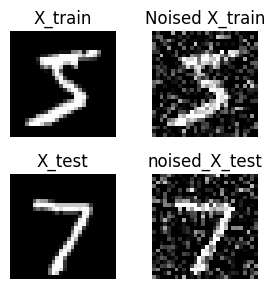

In [31]:
plt.figure(figsize=(3, 3))

plt.subplot(2, 2, 1)
plt.imshow(X_train[0], cmap='gray')
plt.title('X_train')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(tf.squeeze(noised_X_train[0]), cmap='gray')
plt.title('Noised X_train')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(X_test[0], cmap='gray')
plt.title('X_test')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(tf.squeeze(noised_X_test[0]), cmap='gray')
plt.title('noised_X_test')
plt.axis('off')

plt.tight_layout()
plt.show()


<h1><b>Defining Encoder and Decoder Architectures

In [32]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# latent_dim = 64

# def make_encoder():
#     encoder = tf.keras.Sequential()

#     encoder.add(layers.Input(shape=(28, 28, 1)))
#     encoder.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
#     encoder.add(layers.MaxPooling2D((2, 2), padding='same'))

#     encoder.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
#     encoder.add(layers.MaxPooling2D((2, 2), padding='same'))

#     encoder.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
#     encoder.add(layers.Flatten())
#     encoder.add(layers.Dense(latent_dim, activation='relu'))

#     return encoder

# def make_decoder():
#     decoder = models.Sequential()

#     decoder.add(layers.Input(shape=(latent_dim,)))
#     decoder.add(layers.Dense(7 * 7 * 64, activation='relu'))
#     decoder.add(layers.Reshape((7, 7, 64)))

#     decoder.add(layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'))
#     decoder.add(layers.UpSampling2D((2, 2)))

#     decoder.add(layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'))
#     decoder.add(layers.UpSampling2D((2, 2)))

#     decoder.add(layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same'))

#     return decoder

In [33]:
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D, Conv2DTranspose

IMAGE_SIZE = 784  # 28x28 images
INPUT_SHAPE = (28, 28, 1)
shape = X_test.shape[1:]
def make_encoder():
    encoder = Sequential([
      layers.Flatten(),
      layers.Dense(32, activation='relu'),
    ])
    return encoder

def make_decoder():
    decoder = Sequential([
      layers.Dense(tf.math.reduce_prod(shape), activation='sigmoid'),
      layers.Reshape(shape)
    ])
    return decoder

In [34]:
encoder = make_encoder()
decoder = make_decoder()

In [35]:
autoencoder = models.Sequential([encoder,
                                 decoder])

In [36]:
autoencoder.compile(optimizer='adam',
                    loss=losses.MeanSquaredError())

In [37]:
# from keras.utils import plot_model
# plot_model(autoencoder,
#            show_shapes = True,
#            show_layer_names = True,
#            )

<h1><b>Training Autoencoder

In [38]:
# !pip install tensorboard

In [39]:
# %load_ext tensorboard

In [40]:
import os
logdir = "/content/logs/"

In [41]:
tensorboard = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

In [42]:
autoencoder.fit(noised_X_train, X_train,
                epochs=20,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[tensorboard])

Epoch 1/20
1563/1563 [==============================] - 8s 4ms/step - loss: 0.0375 - val_loss: 0.0670
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0182 - val_loss: 0.0633
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0155 - val_loss: 0.0581
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0149 - val_loss: 0.0557
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0147 - val_loss: 0.0501
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0145 - val_loss: 0.0466
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0144 - val_loss: 0.0428
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0143 - val_loss: 0.0372
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0142 - val_loss: 0.0324
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.014

<h1><b>Visualising Results

In [43]:
# %tensorboard --logdir logs

In [44]:
encoded_imgs = encoder(noised_X_test).numpy()
decoded_imgs = decoder(encoded_imgs).numpy()

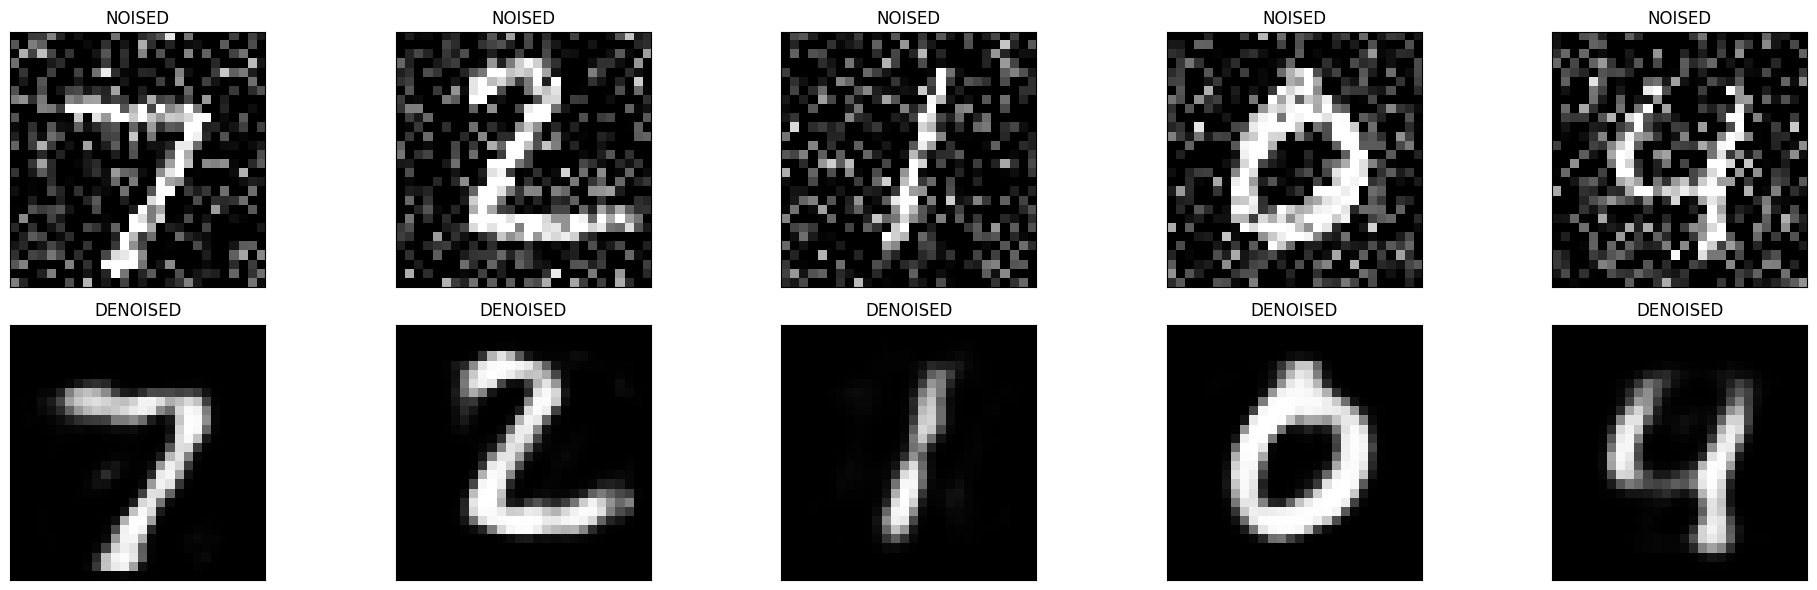

In [45]:
n = 5
plt.figure(figsize=(20, 6))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(tf.squeeze(noised_X_test[i]))
  plt.title("NOISED")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(tf.squeeze(decoded_imgs[i]))
  plt.title("DENOISED")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()